In [1]:
#Basic Labraries
import pandas as pd 
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
%matplotlib inline
# Jupyter notebooks widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Interactive Shells
from IPython.display import display
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Setting up chart size and background
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
# for other background style use following command
#plt.style.available

In [2]:
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [4]:
# remove unnecessary data
data = data.drop(['color','director_facebook_likes','actor_3_facebook_likes',                       
'actor_1_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes',
'facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords']
                 ,axis=1)

In [5]:
# checking for rows having high percentage of missing values
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [6]:
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [7]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [8]:
data = data[data.isnull().sum(axis=1)<=2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [9]:
# for numeric columns use mean 
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(),inplace=True)
data['duration'].fillna(data['duration'].mean(),inplace=True)

# using mode for categorical value
data['language'].fillna(data['language'].mode()[0],inplace=True)

data['actor_2_name'].fillna('Unknown Actor',inplace=True)
data['actor_3_name'].fillna('Unknown Actor',inplace=True)

data.isnull().sum().sum()

0

# Feature Engineering

In [10]:
# Let's convert budget and gross from doller to million doller 
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

# create profit column using budget and gross
data['Profit'] = data['gross'] - data['budget']

# Check the name of top 10 profitable movies
data[['Profit','movie_title']].sort_values(by='Profit',ascending = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [11]:
data.drop_duplicates(subset=None,keep='first',inplace=True)

data[['Profit','movie_title']].sort_values(by='Profit',ascending = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


In [12]:
data['genres'].value_counts()

Drama                                              153
Comedy|Drama|Romance                               151
Comedy|Drama                                       147
Comedy                                             145
Comedy|Romance                                     135
                                                  ... 
Action|Biography|Drama|History                       1
Action|Adventure|Family|Fantasy|Sci-Fi|Thriller      1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller           1
Action|Animation|Comedy|Family                       1
Adventure|Family|Fantasy|Music|Musical               1
Name: genres, Length: 762, dtype: int64

In [13]:
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice                  0.001600
1    150                        Ghostbusters                  0.001076
2   1582                        Ghostbusters                  0.001076
3     96                        Interstellar                  0.001025
4   3015               10 Days in a Madhouse                  0.000828
5    945                      Into the Woods                  0.000693
6     73                       Suicide Squad                  0.000653
7   1190                Fifty Shades of Grey                  0.000624
8    108                            Warcraft                  0.000623
9     92        Independence Day: Resurgence                  0.000599


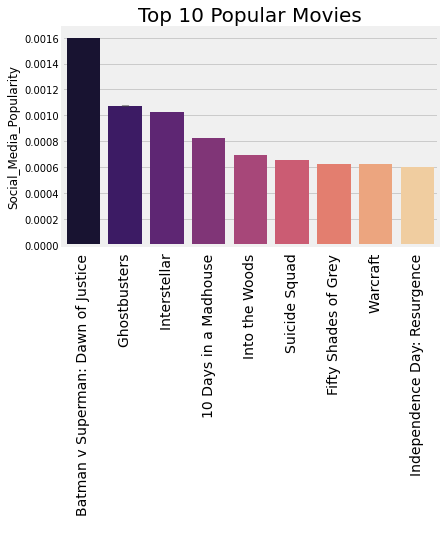

In [14]:
# To calculate social media popularity
data['Social_Media_Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])*
                                   (data['movie_facebook_likes']))/1000000
# top 10 Popular movies
x = data[['movie_title','Social_Media_Popularity']].sort_values(by='Social_Media_Popularity',
                                                               ascending =False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'],x['Social_Media_Popularity'],palette = 'magma')
plt.title('Top 10 Popular Movies',fontsize = 20)
plt.xticks(rotation = 90 , fontsize = 14)
plt.xlabel(' ')

plt.show()

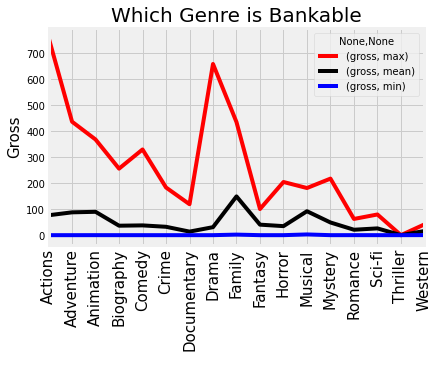

In [15]:
# Comparing Gross with Genres
#first group the genres sand get max,min and avg gross of the movies of thar genre
display(data[['Genre1','gross']].groupby(['Genre1']).agg(['max','mean','min']).style.
        background_gradient(cmap='Wistia'))
#plot these value using lineplot
data[['Genre1','gross']].groupby(['Genre1']).agg(['max','mean','min']).plot(kind ='line',
                                            colors =['red','black','blue'])
plt.title('Which Genre is Bankable',fontsize=20)
plt.xticks(np.arange(17),['Actions','Adventure','Animation','Biography','Comedy','Crime',
                         'Documentary','Drama','Family','Fantasy','Horror','Musical','Mystery',
                         'Romance','Sci-fi','Thriller','Western'],rotation=90,fontsize=15)
plt.ylabel('Gross',fontsize=15)
plt.xlabel(' ')

plt.show()

In [16]:
print('The Most Profitable Movie From Each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1','movie_title','gross']].
        style.background_gradient(cmap='copper'))

The Most Profitable Movie From Each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.506
509,Adventure,The Lion King,422.784
521,Animation,Despicable Me 2,368.05
1403,Biography,The Blind Side,255.95
836,Comedy,Forrest Gump,329.691
3466,Crime,The Godfather,134.822
3583,Documentary,Fahrenheit 9/11,119.078
26,Drama,Titanic,658.672
3080,Family,E.T. the Extra-Terrestrial,434.949
2485,Fantasy,The Others,96.4718


In [17]:


data['genres'] = data['genres'].replace('|', ' ')
data['movie_title'][0]

'Avatar\xa0'

In [18]:
data['movie_title'] = data['movie_title'].str.lower()

data['movie_title'] = data['movie_title'].str[:-1]

In [19]:
data1 = data.drop(['num_critic_for_reviews','gross','budget','num_voted_users','duration','num_user_for_reviews',
                   'language','movie_facebook_likes','Profit','Genre1','Genre2','Genre3','Genre4'
                  ,'Social_Media_Popularity','Moviegenres','title_year','imdb_score']
                 ,axis=1)

In [20]:
data1.head()

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name
0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,Wes Studi
1,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,Jack Davenport
2,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,Stephanie Sigman
3,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,Joseph Gordon-Levitt
5,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,Polly Walker


In [21]:
data1['genres'] = data1['genres'].str.replace('|', ' ')
#data['movie_title'][0]



In [22]:
data1['movie_title'] = data1['movie_title'].str.lower()

data1['movie_title'] = data1['movie_title']

In [23]:
data1.head()

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name
0,James Cameron,Joel David Moore,Action Adventure Fantasy Sci-Fi,CCH Pounder,avatar,Wes Studi
1,Gore Verbinski,Orlando Bloom,Action Adventure Fantasy,Johnny Depp,pirates of the caribbean: at world's end,Jack Davenport
2,Sam Mendes,Rory Kinnear,Action Adventure Thriller,Christoph Waltz,spectre,Stephanie Sigman
3,Christopher Nolan,Christian Bale,Action Thriller,Tom Hardy,the dark knight rises,Joseph Gordon-Levitt
5,Andrew Stanton,Samantha Morton,Action Adventure Sci-Fi,Daryl Sabara,john carter,Polly Walker


In [24]:
data1.to_csv('data2.csv',index=False)